In [ ]:
# # scikit-learn bootstrap
# from sklearn.utils import resample
# import numpy as np
# # data sample
# sampleSize = 3
# data = np.array(range(1, sampleSize+1))
# data



In [ ]:
# # prepare bootstrap sample
# boot = resample(data, replace=True, n_samples=sampleSize, random_state=1)
# print('Bootstrap sample: %s' % boot)
# # out of bag observations
# oob = [x for x in data if x not in boot]
# print('OOB: %s' % oob)

Variance of a sample mean

In [ ]:
# initialMean = np.mean(data)
# initialMean

In [ ]:
# initialSTD = np.std(data)
# initialSTD

In [ ]:
from sklearn.utils import resample
import numpy as np
sampleSize = 3
data = np.array(range(1, sampleSize+1))
sampleMeans = []
sampleCount = 500
for i in range(sampleCount):
    boot = resample(data, replace=True, n_samples=sampleSize, random_state=i)
    sampleMeans.append(np.mean(boot))
sampleMeanVarHat = np.var(sampleMeans)
sampleMeanVarHat

0.2470093333333333

In [ ]:
from sklearn.utils import resample
import numpy as np
sampleSize = 3
data = np.array(range(1, sampleSize+1))
sampleMeans = []
sampleMeansVarHats = []
sampleCountList = [5, 105, 205, 305, 405]
for j, k in enumerate(sampleCountList):
    sampleCount = sampleCountList[j]
    for i in range(sampleCount):
        boot = resample(data, replace=True, n_samples=sampleSize, random_state=None)
        sampleMeans.append(np.mean(boot))
    sampleMeansVarHats.append(np.var(sampleMeans))

sampleMeansVarHats



[0.4000000000000001,
 0.25219467401285584,
 0.2391355225217659,
 0.24860995490808183,
 0.23717776455813336]

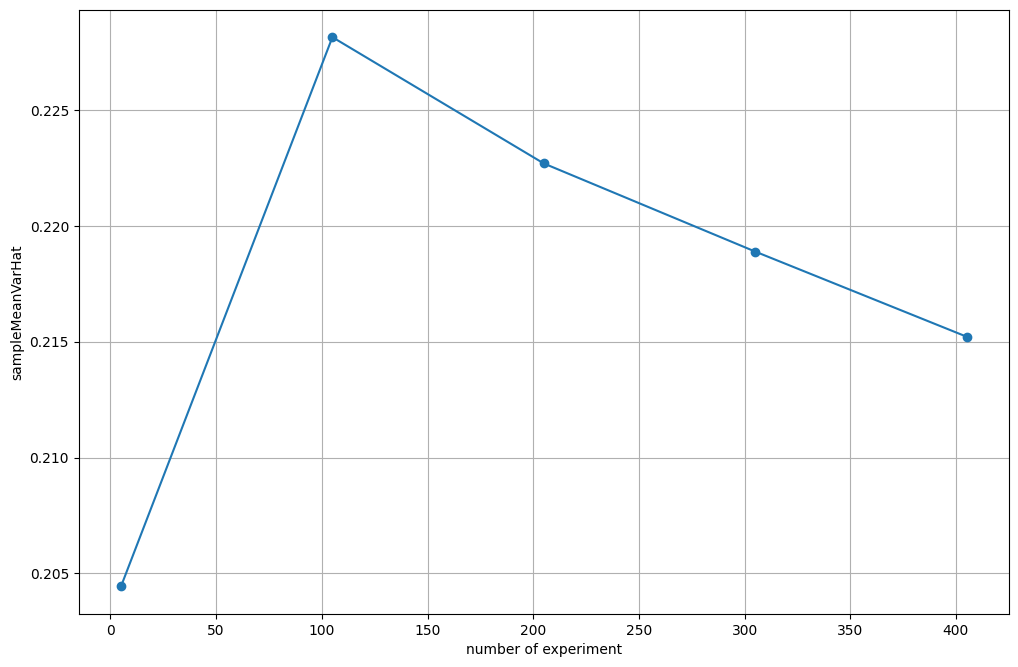

In [ ]:
from matplotlib import pyplot as plt
plt.grid()
plt.xlabel("number of experiment")
plt.ylabel("sampleMeanVarHat")
plt.plot(sampleCountList, sampleMeansByObs, marker='o')

Now by formula

In [ ]:
sampleMeanVarHat2 = np.var(data) / sampleSize
sampleMeanVarHat2

0.2222222222222222

(array([ 49., 109.,   0., 231.,   0., 248., 229.,   0., 116.,  43.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

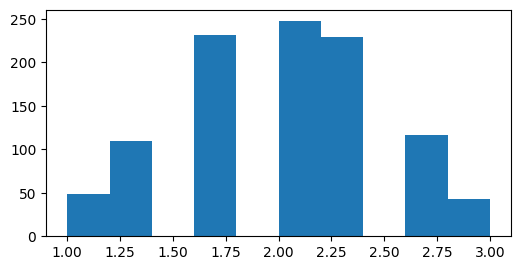

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 3))
plt.hist(sampleMeans)



```
# This is formatted as code
```

Both above are close to each other - bootstrap and formula

Now let us use more special means

However, our lecture does not cover the rest of this file. 

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
#from sklearn.cross_validation.Bootstrap 

The scikit-learn version is 0.22.2.post1.


In the new sklearn there is no Bootstrap class. 

But it is present in bootstrapped library. 

So we should install it by pip. 

In [ ]:
!pip install bootstrapped

In [ ]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

mean = 100
stdev = 10
size = 50000

population = np.random.normal(loc=mean, scale=stdev, size=size)

xBarStd = 10 / np.sqrt(size)

# take 1k 'samples' from the larger population
subSampleSize = 1000
samples = population[:subSampleSize]

print(bs.bootstrap(samples, stat_func=bs_stats.mean))

print(bs.bootstrap(samples, stat_func=bs_stats.std))

99.61152431295946    (98.98793500771212, 100.23094020159806)
9.998479553158894    (9.559233410003849, 10.445647515214256)


In [ ]:
print(bs.bootstrap(data, stat_func=bs_stats.mean))

2.0    (1.0, 3.0)


In [ ]:
print(bs.bootstrap(data, stat_func=bs_stats.std))

0.816496580927726    (0.6901841202733887, 1.632993161855452)


In [ ]:
print(bs.bootstrap.__doc__)

Returns bootstrap estimate.
    Args:
        values: numpy array (or scipy.sparse.csr_matrix) of values to bootstrap
        stat_func: statistic to bootstrap. We provide several default functions:
                * stat_functions.mean
                * stat_functions.sum
                * stat_functions.std
        denominator_values: optional array that does division after the
            statistic is aggregated. This lets you compute group level division
            statistics. One corresponding entry per record in @values.
            Example:
                SUM(value) / SUM(denom) instead of MEAN(value / denom)

                Ex. Cost Per Click
                cost per click across a group
                    SUM(revenue) / SUM(clicks)
                mean cost per click for each
                    MEAN(revenue / clicks)
        alpha: alpha value representing the confidence interval.
            Defaults to 0.05, i.e., 95th-CI.
        num_iterations: number of bootstrap ite

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as npr
import collections

In [ ]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

In [ ]:
# take 1k 'samples' from the larger population
samples = population[:1000]

In [ ]:
np.std([samples], axis=1)

array([9.99847955])

In [ ]:
# calculate bootstrap estimates for the mean and standard deviation
mean_results = bs.bootstrap(samples, stat_func=bs_stats.mean)
# see advanced_bootstrap_features.ipynb for a discussion of how to use the stat_func arg
stdev_results = bs.bootstrap(samples, stat_func=bs_stats.std)

In [ ]:
print('Bootstrapped mean should be: {}'.format(mean))
print('\t' + str(mean_results))
print('')
print('Bootstrapped stdev should be: {}'.format(stdev))
print('\t' + str(stdev_results))


Bootstrapped mean should be: 100
	99.61152431295946    (98.99296924594823, 100.24068543832949)

Bootstrapped stdev should be: 10
	9.998479553158894    (9.561308947852359, 10.436778763377815)


In [ ]:
import scipy.stats as st

In [ ]:
sample_size = [100, 350, 500, 1000, 2500, 3500, 5000, 8000, 10000]
bootstrap_results = []
normal_results = []
for i in sample_size:
    samples = np.random.choice(population, i, replace=True)
    bsr = bs.bootstrap(samples, stat_func=bs_stats.mean, alpha=0.05)
    
    mr = st.t.interval(1-0.05, len(samples)-1, loc=np.mean(samples), scale=st.sem(samples))

    bootstrap_results.append((bsr.lower_bound, bsr.upper_bound))
    normal_results.append(mr)



In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Text(0.5, 1.0, 't-distribution vs Bootstrap')

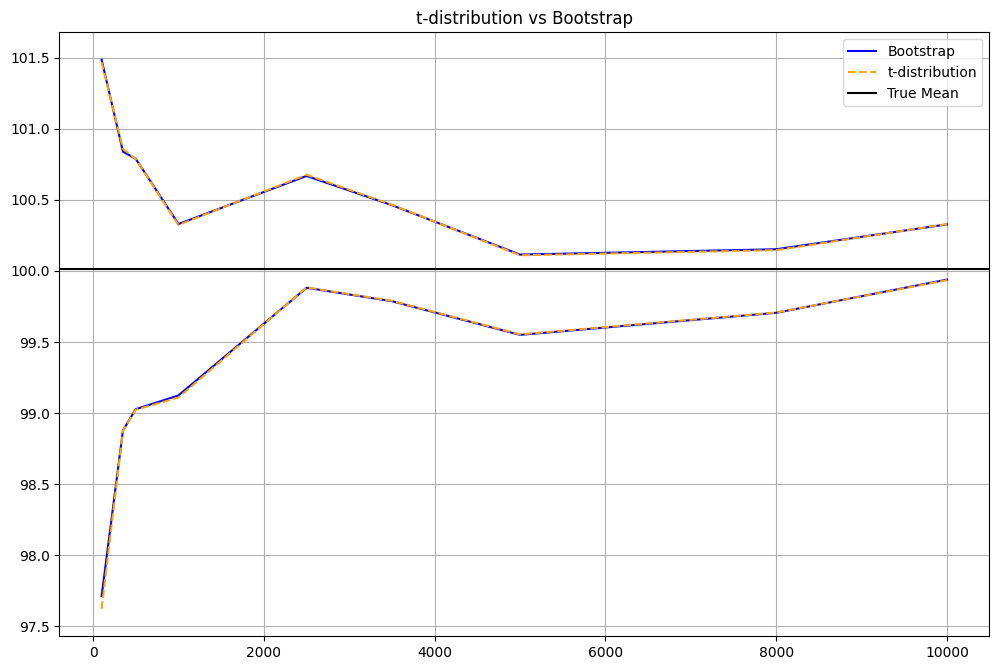

In [ ]:
plt.grid()
plt.plot(sample_size, [x[1] for x in bootstrap_results], c='blue')
plt.plot(sample_size, [x[1] for x in normal_results], linestyle='--', c='orange')

plt.plot(sample_size, [x[0] for x in bootstrap_results], c='blue', 
         label='Bootstrap')
plt.plot(sample_size, [x[0] for x in normal_results], linestyle='--', c='orange', 
         label='t-distribution')

plt.axhline(population.mean(), c='black', label='True Mean')
plt.legend(loc='best')
plt.title('t-distribution vs Bootstrap')